### Загрузка пакетов

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка датасета

In [2]:
churn_df = pd.read_csv('telecom_churn_clean.csv', index_col=0)
print(churn_df)

      account_length  area_code  international_plan  voice_mail_plan  \
0                128        415                   0                1   
1                107        415                   0                1   
2                137        415                   0                0   
3                 84        408                   1                0   
4                 75        415                   1                0   
...              ...        ...                 ...              ...   
3328             192        415                   0                1   
3329              68        415                   0                0   
3330              28        510                   0                0   
3331             184        510                   1                0   
3332              74        415                   0                1   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        25              265.1              110   
1

In [3]:
churn_df.columns

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

### Разделим на целевую и независимые переменные

In [4]:
y = churn_df['churn'].values
X = churn_df[['total_day_calls', 'customer_service_calls']].values

In [5]:
print(X)

[[110   1]
 [123   1]
 [114   0]
 ...
 [109   2]
 [105   2]
 [113   0]]


In [6]:
print(y)

[0 0 0 ... 0 0 0]


### Построение классификатора

In [7]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X, y)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
df = churn_df[['total_day_calls', 'customer_service_calls', 'churn']]

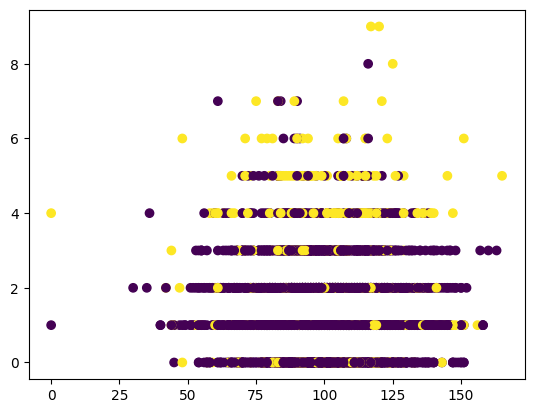

In [9]:
plt.scatter(df['total_day_calls'], df['customer_service_calls'], c=df['churn'])
plt.show()

### Создание набора для тестирования

In [10]:
X_new = np.array([
  [95, 0],
  [99, 1],
  [123, 5],
  [15, 83],
  [150, 6],
  [32, 0]]
)

### Предсказание

In [11]:
y_pred = knn.predict(X_new)
print(y_pred)

[0 0 0 0 0 0]


### Разивка данных на test/train

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)


In [13]:
knn.fit(X_train, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
print(knn.score(X_test, y_test))

0.856071964017991


### Создание множества соседей

In [15]:
neighbors = np.arange(1, 31)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors)
print(train_accuracies)
print(test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
{np.int64(1): 0.8094523630907727, np.int64(2): 0.8563390847711928, np.int64(3): 0.8480870217554388, np.int64(4): 0.86384096024006, np.int64(5): 0.8623405851462865, np.int64(6): 0.8593398349587397, np.int64(7): 0.8630907726931732, np.int64(8): 0.8600900225056264, np.int64(9): 0.859714928732183, np.int64(10): 0.8567141785446362, np.int64(11): 0.8563390847711928, np.int64(12): 0.8559639909977494, np.int64(13): 0.8574643660915229, np.int64(14): 0.8548387096774194, np.int64(15): 0.8555888972243061, np.int64(16): 0.8540885221305327, np.int64(17): 0.8559639909977494, np.int64(18): 0.8559639909977494, np.int64(19): 0.8559639909977494, np.int64(20): 0.8552138034508627, np.int64(21): 0.8559639909977494, np.int64(22): 0.8548387096774194, np.int64(23): 0.8552138034508627, np.int64(24): 0.8552138034508627, np.int64(25): 0.8552138034508627, np.int64(26): 0.8552138034508627, np.int64(27): 0.8552138034508627, 

### Оценка модели от кол-ва соседей

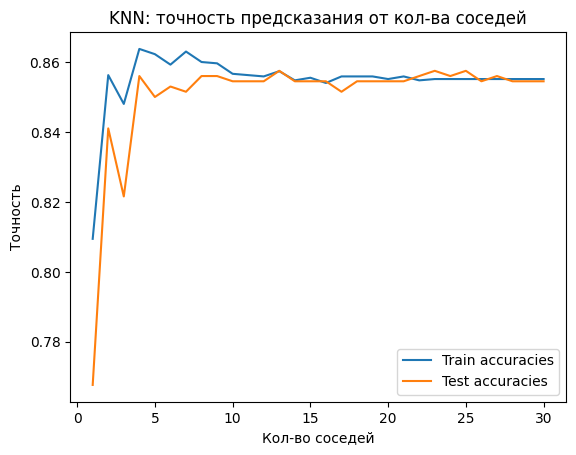

In [21]:
plt.title('KNN: точность предсказания от кол-ва соседей')
plt.plot(neighbors, train_accuracies.values(), label = 'Train accuracies')
plt.plot(neighbors, test_accuracies.values(), label = 'Test accuracies')
plt.legend()
plt.xlabel('Кол-во соседей')
plt.ylabel('Точность')
plt.show()